<a href="https://colab.research.google.com/github/dondees/Dev_Meetings_DS/blob/master/Copy_of_3_Dev_meeting_KNN_85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DevMeeting – Data Science

## 3. Scikit learn

![scikit-learn](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/200px-Scikit_learn_logo_small.svg.png)

scikit-learn to biblioteka implementująca większość powszechnie używanych metod uczenia maszynowego. W niniejszym projekcie wykorzystamy model __KNN__ (ang. k nearest neighbours), zaimplementowany w bibliotece scikit-learn, do zbudowania klasyfikatora.

W skład scikit-learn, poza metodami uczenia maszynowego, wchodzą algorytmy wstępnego przetwarzania danych (preprocessingu), wyboru modeli i wizualizacji.

In [0]:
import numpy as np
import pandas as pd

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Miary jakości
from sklearn.metrics import precision_score

# Przechowywanie modeli
import pickle

## 3.1 Podstawy Uczenia Maszynowego

## 3.2 Wstępne przetwarzanie danych

### Uzupełnianie brakujących danych

In [0]:
df = pd.DataFrame(
    {"pet": ["cat", "dog", "cat", "dog"],
     "age": [3, 7, 1, 2],
     "length": [40, np.nan, 46, 80]
    }
)

df

,pet,age,length
0,cat,3,40.0
1,dog,7,NaN
2,cat,1,46.0
3,dog,2,80.0


In [0]:
mean_length = df["length"].mean()
mean_length

55.333333333333336

In [0]:
df["length"] = df["length"].fillna(mean_length)
df

,pet,age,length
0,cat,3,40.000000
1,dog,7,55.333333
2,cat,1,46.000000
3,dog,2,80.000000


### Usuwanie zbędnych cech

In [0]:
df = pd.DataFrame(
    {"pet": ["cat", "dog", "cat", "dog"],
     "age": [3, 7, 1, 2],
     "length": [40, 50, 46, 80],
     "name": ["Fluff", "Skip", "Molly", "Bear"],
     "owner_phone": ["555-100", "1-880-232", np.nan, "333-000-111"],
    }
)

df

,pet,age,length,name,owner_phone
0,cat,3,40,Fluff,555-100
1,dog,7,50,Skip,1-880-232
2,cat,1,46,Molly,NaN
3,dog,2,80,Bear,333-000-111


In [0]:
new_df = df.drop(columns=["name", "owner_phone"])
new_df

,pet,age,length
0,cat,3,40
1,dog,7,50
2,cat,1,46
3,dog,2,80


In [0]:
new_df = df.loc[:, ["pet", "age", "length"]]
new_df

,pet,age,length
0,cat,3,40
1,dog,7,50
2,cat,1,46
3,dog,2,80


### Binaryzacja cech kategorycznych

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
df = pd.DataFrame(
    {"pet": ["cat", "dog", "cat", "dog"],
     "age": [3, 7, 1, 2],
     "length": [40, 50, 46, 80]
    }
)

In [0]:
encoder = LabelEncoder()

# wybór kolumny "pet"
pet_category = df.loc[:, "pet"]
pet_category

0    cat
1    dog
2    cat
3    dog
Name: pet, dtype: object

In [0]:
# koder zapamiętuje jakie wartości mogą przyjmować cechy
encoder.fit(pet_category)

LabelEncoder()

In [0]:
# przekształcamy cechy w wartości numeryczne
binarized_category = encoder.transform(pet_category)
binarized_category

array([0, 1, 0, 1])

In [0]:
df["pet"] = binarized_category
df

,pet,age,length
0,0,3,40
1,1,7,50
2,0,1,46
3,1,2,80


### Normalizacja danych numerycznych

In [0]:
df_norm_example = pd.DataFrame(
    {"pet": ["cat", "dog", "cat", "dog"],
     "age": [3, 17, 8, 11],
     "length": [12, 150, 32, 110]
    }
)

In [0]:
def get_normalized_column(df, column_name):
    return (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())

In [0]:
norm_column = get_normalized_column(df_norm_example, "age")
norm_column

0    0.000000
1    1.000000
2    0.357143
3    0.571429
Name: age, dtype: float64

In [0]:
df_norm_example["age"] = norm_column
df_norm_example

,pet,age,length
0,cat,0.000000,12
1,dog,1.000000,150
2,cat,0.357143,32
3,dog,0.571429,110


## 3.3 Podział zbioru na treningowy/testowy

In [0]:
from sklearn.model_selection import train_test_split

Do następnych przykładów używać będziemy zbioru Iris

In [0]:
iris = pd.read_csv("https://dzkb.github.io/devmeeting-data-science/data/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
X = iris.drop(columns="species")
y = iris.loc[:, "species"]

In [0]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

print("Zbiór treningowy:", train_X.shape, train_y.shape)
print("Zbiór testowy:", test_X.shape, test_y.shape)

Zbiór treningowy: (120, 4) (120,)
Zbiór testowy: (30, 4) (30,)


## 3.4 Model KNN

![KNN](https://miro.medium.com/max/650/0*Sk18h9op6uK9EpT8.)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(
  # miejsce na hiperparametry
)

# uczenie modelu KNN
knn.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
# predykcja na zbiorze testowym
predicted_y = knn.predict(test_X)
predicted_y

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

## 3.5 Testowanie modelu

In [0]:
from sklearn.metrics import precision_score

In [0]:
precision = precision_score(test_y, predicted_y, average="micro")
print("Precyzja: {:.2f}".format(precision))

Precyzja: 1.00


## 3.6 Wizualizacja modelu KNN

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [0]:
# czytelniejsza wizualizacja:
# - nazwy cech w zbiorze
iris_feature_names = X.columns
# - nazwy klas, które przewidujemy
iris_class_names = y.unique()

print("Cechy:", iris_feature_names)
print("Klasy:", iris_class_names)

Cechy: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
Klasy: ['setosa' 'versicolor' 'virginica']


In [0]:
def knn_comparison(data, selected_feature_pair, k):
    x = data[selected_feature_pair].values

    encoder = LabelEncoder()
    y = encoder.fit_transform(data['species'])

    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    model.fit(x, y)

    # Wizualizacja regionów decyzyjnych
    plot_decision_regions(x, y, clf=model, legend=2)
  
    # Oznaczenie osi
    plt.xlabel(selected_feature_pair[0])
    plt.ylabel(selected_feature_pair[1])
    plt.title('KNN dla k='+ str(k))
    plt.show()

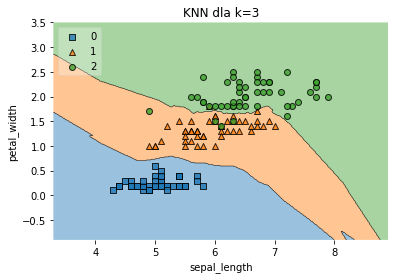

In [0]:
knn_comparison(iris, ['sepal_length', 'petal_width'], 3)

## 3.7 Przechowywanie modeli

In [0]:
import pickle

Przy korzystaniu z modeli potrzebujemy zapisać również kroki przetwarzania wstępnego, np. obiekt **LabelEncoder**.

In [0]:
model = (encoder, knn)

In [0]:
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

In [0]:
with open("model.pkl", "rb") as model_file:
    unpickled_model = pickle.load(model_file)
    unpickled_model

In [0]:
encoder, model = unpickled_model

# Zadania do wykonania

0. Opcjonalne - Zwizualizuj decyzje modelu knn dla różnych par cech oraz sprawdź wpływ parametru k na budowanie przestrzeni klas.

1. Wczytaj zbiór Titanic i dokonaj preprocessingu:
  *  usuń niepotrzebne kolumny
  *  podziel zbiór na wektory cech (`X`) i klas (`y`)
  *  podziel zbiór na podzbiór uczący (80%) i testowy (20%)
  *  Opcjonalnie - dokonaj binaryzacji atrybutów kategorycznych (np. płeć)
2. Naucz model KNN przy użyciu zbioru uczącego
3. Sprawdź jakość uzyskanego modelu na zbiorze testowym (accuracy, precision, recall)
4. Opcjonalnie - dokonaj normalizacji danych numerycznych i sprawdź jaki ma wpływ na jakość predykcji
5. Zapisz modele przy pomocy `pickle`

In [0]:
import pandas as pd
titanic = pd.read_csv('https://dzkb.github.io/devmeeting-data-science/data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
new_df = titanic.drop(columns=["PassengerId", "Pclass", "Name", "SibSp", "Parch", "Ticket", "Embarked"])
new_df

,Survived,Sex,Age,Fare,Cabin
0,0,male,22.0,7.2500,NaN
1,1,female,38.0,71.2833,C85
2,1,female,26.0,7.9250,NaN
3,1,female,35.0,53.1000,C123
4,0,male,35.0,8.0500,NaN
...,...,...,...,...,...
886,0,male,27.0,13.0000,NaN
887,1,female,19.0,30.0000,B42
888,0,female,NaN,23.4500,NaN
889,1,male,26.0,30.0000,C148


In [0]:
new_df.isnull().sum()

Survived      0
Sex           0
Age         177
Fare          0
Cabin       687
dtype: int64

In [0]:
mean_length = new_df["Age"].mean()
mean_length

29.69911764705882

In [0]:
new_df["Age"] = new_df["Age"].fillna(mean_length)
new_df

,Survived,Sex,Age,Fare,Cabin
0,0,male,22.000000,7.2500,NaN
1,1,female,38.000000,71.2833,C85
2,1,female,26.000000,7.9250,NaN
3,1,female,35.000000,53.1000,C123
4,0,male,35.000000,8.0500,NaN
...,...,...,...,...,...
886,0,male,27.000000,13.0000,NaN
887,1,female,19.000000,30.0000,B42
888,0,female,29.699118,23.4500,NaN
889,1,male,26.000000,30.0000,C148


In [0]:
new_df.isnull().sum()

Survived      0
Sex           0
Age           0
Fare          0
Cabin       687
dtype: int64

In [0]:
new_df = new_df.dropna()
new_df.isnull().sum()

Survived    0
Sex         0
Age         0
Fare        0
Cabin       0
dtype: int64

In [0]:
new_df.head()

,Survived,Sex,Age,Fare,Cabin
1,1,female,38.0,71.2833,C85
3,1,female,35.0,53.1000,C123
6,0,male,54.0,51.8625,E46
10,1,female,4.0,16.7000,G6
11,1,female,58.0,26.5500,C103


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
encoder = LabelEncoder()

# wybór kolumny "sex"
sex_category = new_df.loc[:, "Sex"]
sex_category

1      0
3      0
6      1
10     0
11     0
      ..
871    0
872    1
879    0
887    0
889    1
Name: Sex, Length: 204, dtype: int64

In [0]:
# koder zapamiętuje jakie wartości mogą przyjmować cechy
encoder.fit(sex_category)

LabelEncoder()

In [0]:
# przekształcamy cechy w wartości numeryczne
binarized_category = encoder.transform(sex_category)
binarized_category

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1])

In [0]:
new_df["Sex"] = binarized_category
new_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Survived,Sex,Age,Fare,Cabin
1,1,0,38.0,71.2833,C85
3,1,0,35.0,53.1000,C123
6,0,1,54.0,51.8625,E46
10,1,0,4.0,16.7000,G6
11,1,0,58.0,26.5500,C103
...,...,...,...,...,...
871,1,0,47.0,52.5542,D35
872,0,1,33.0,5.0000,B51 B53 B55
879,1,0,56.0,83.1583,C50
887,1,0,19.0,30.0000,B42


In [0]:
encoder = LabelEncoder()

# wybór kolumny "sex"
cabin_category = new_df.loc[:, "Cabin"]
cabin_category

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [0]:
# koder zapamiętuje jakie wartości mogą przyjmować cechy
encoder.fit(cabin_category)

LabelEncoder()

In [0]:
# przekształcamy cechy w wartości numeryczne
binarized_category = encoder.transform(cabin_category)
binarized_category

array([ 81,  55, 129, 145,  49, 111,  13,  63,  41, 101,  23,  71,  21,
        80, 142, 140,  63, 122,  12,  91,  98,  52,  36, 116,  98, 138,
       107,  55,  45, 141,  61, 123,  18,  14,  69, 144,   9, 141,  28,
        43, 145,   8, 103,  93,  87,  80,  78, 102, 145,  83,  40, 134,
        46,  57,  89,  54, 113,   3,  31,  90,  62,  51,  36, 116,  62,
        74, 125,  72,  35,  76, 124,  65,  90,  17,  56,  85,  61, 127,
       146, 141,  63, 142,  59, 123, 104,  24, 131,  79,  47, 103, 145,
        78, 115,  71, 128,  47,  63,  10,  50,  53,  86, 126,  97, 117,
       133,  90,   1,  31,  87,  25,  64,  96,  62,  42,  74, 121, 106,
       142,  39,  17,  88,  26,  27,  20,  82,  77,   2, 134,  48, 121,
       128,  75,   0, 135,  29,  96,   4,  57, 144,  95, 110, 114,   5,
        33,  24, 101,   7, 108, 132,  58,  38,  34, 109,  32,  19,  75,
       139,  73, 120, 120,  84,  56,  58, 140,  66, 116, 137,  32,  15,
       105,  67,  35,  20, 100, 118,  40,  47,  92, 136, 143,  2

In [0]:
new_df["Cabin"] = binarized_category
new_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Survived,Sex,Age,Fare,Cabin
1,1,0,38.0,71.2833,81
3,1,0,35.0,53.1000,55
6,0,1,54.0,51.8625,129
10,1,0,4.0,16.7000,145
11,1,0,58.0,26.5500,49
...,...,...,...,...,...
871,1,0,47.0,52.5542,102
872,0,1,33.0,5.0000,34
879,1,0,56.0,83.1583,70
887,1,0,19.0,30.0000,30


In [0]:
def get_normalized_column(new_df, column_name):
    return (new_df[column_name] - new_df[column_name].min()) / (new_df[column_name].max() - new_df[column_name].min())

In [0]:
norm_column = get_normalized_column(new_df, "Age")
norm_column

1      0.468892
3      0.430956
6      0.671219
10     0.038948
11     0.721801
         ...   
871    0.582701
872    0.405665
879    0.696510
887    0.228629
889    0.317147
Name: Age, Length: 204, dtype: float64

In [0]:
new_df["Age"] = norm_column
new_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Survived,Sex,Age,Fare,Cabin
1,1,0,0.468892,71.2833,81
3,1,0,0.430956,53.1000,55
6,0,1,0.671219,51.8625,129
10,1,0,0.038948,16.7000,145
11,1,0,0.721801,26.5500,49
...,...,...,...,...,...
871,1,0,0.582701,52.5542,102
872,0,1,0.405665,5.0000,34
879,1,0,0.696510,83.1583,70
887,1,0,0.228629,30.0000,30


In [0]:
norm_column = get_normalized_column(new_df, "Fare")
norm_column

1      0.139136
3      0.103644
6      0.101229
10     0.032596
11     0.051822
         ...   
871    0.102579
872    0.009759
879    0.162314
887    0.058556
889    0.058556
Name: Fare, Length: 204, dtype: float64

In [0]:
new_df["Fare"] = norm_column
new_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Survived,Sex,Age,Fare,Cabin
1,1,0,0.468892,0.139136,81
3,1,0,0.430956,0.103644,55
6,0,1,0.671219,0.101229,129
10,1,0,0.038948,0.032596,145
11,1,0,0.721801,0.051822,49
...,...,...,...,...,...
871,1,0,0.582701,0.102579,102
872,0,1,0.405665,0.009759,34
879,1,0,0.696510,0.162314,70
887,1,0,0.228629,0.058556,30


In [0]:
norm_column = get_normalized_column(new_df, "Cabin")
norm_column

1      0.554795
3      0.376712
6      0.883562
10     0.993151
11     0.335616
         ...   
871    0.698630
872    0.232877
879    0.479452
887    0.205479
889    0.410959
Name: Cabin, Length: 204, dtype: float64

In [0]:
new_df["Cabin"] = norm_column
new_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Survived,Sex,Age,Fare,Cabin
1,1,0,0.468892,0.139136,0.554795
3,1,0,0.430956,0.103644,0.376712
6,0,1,0.671219,0.101229,0.883562
10,1,0,0.038948,0.032596,0.993151
11,1,0,0.721801,0.051822,0.335616
...,...,...,...,...,...
871,1,0,0.582701,0.102579,0.698630
872,0,1,0.405665,0.009759,0.232877
879,1,0,0.696510,0.162314,0.479452
887,1,0,0.228629,0.058556,0.205479


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = new_df.drop(columns="Survived")
y = new_df.loc[:, "Survived"]

In [0]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

print("Zbiór treningowy:", train_X.shape, train_y.shape)
print("Zbiór testowy:", test_X.shape, test_y.shape)

Zbiór treningowy: (163, 4) (163,)
Zbiór testowy: (41, 4) (41,)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors= 20
  # miejsce na hiperparametry
)

# uczenie modelu KNN
knn.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [0]:
# predykcja na zbiorze testowym
predicted_y = knn.predict(test_X)
predicted_y

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [0]:
from sklearn.metrics import precision_score

In [0]:
precision = precision_score(test_y, predicted_y, average="micro")
print("Precyzja: {:.2f}".format(precision))

Precyzja: 0.85


In [0]:
import pickle

In [0]:
model = (encoder, knn)

In [0]:
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

In [0]:
with open("model.pkl", "rb") as model_file:
    unpickled_model2 = pickle.load(model_file)
    unpickled_model2

In [0]:
encoder, model = unpickled_model2